In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#Abimael Bautista Oliveros - 20120084 - Atividad:1
#el autor con mas libros es Jeff Kinney
#El ano mas reciente del dataset es 2019
#la calificación promedio de los libros de Dav Pilkey es 4.90

df = pd.read_csv('books_simple_dataset.csv')

tipos_columnas = df.dtypes
print(tipos_columnas)

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object


In [69]:
import pandas as pd

Columna = ['rating','year']
estadistica = df[Columna].describe()

print(estadistica)

          rating         year
count  99.000000    99.000000
mean    4.609091  2013.787879
std     0.199024     3.227031
min     3.800000  2009.000000
25%     4.500000  2011.000000
50%     4.600000  2014.000000
75%     4.700000  2016.000000
max     4.900000  2019.000000


In [71]:
import pandas as pd

categoricas = ['name', 'author', 'genre']
for columna in categoricas:
    valores_unicos = df[columna].unique()
    unicos = len(valores_unicos)
    
    print(f"Columna '{columna}':")
    print(f"Posibles valores: {valores_unicos}")
    print("\n")
    print(f"Cantidad de valores únicos: {unicos}")
    if unicos <= 10:
        print("Categorización viable")
    else:
        print("Categorización no viable")
    
    print("\n")

Columna 'name':
Posibles valores: ['10-Day Green Smoothie Cleanse' '11/22/63: A Novel'
 '12 Rules for Life: An Antidote to Chaos' '1984 (Signet Classics)'
 '5,000 Awesome Facts (About Everything!) (National Geographic Kids)' nan
 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons'
 'A Gentleman in Moscow: A Novel'
 'A Higher Loyalty: Truth, Lies, and Leadership'
 'A Man Called Ove: A Novel'
 "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror"
 'A Stolen Life: A Memoir' 'A Wrinkle in Time (Time Quintet)'
 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment'
 'Adult Coloring Book: Stress Relieving Animal Designs'
 'Adult Coloring Book: Stress Relieving Patterns'
 'Adult Coloring Books: A Coloring Book for Adults Featuring Mandalas and Henna Inspired Flowers, Animals, and Paisley…'
 'Alexander Hamilton' 'All the Light We Cannot See' 'Alleg

In [48]:
import pandas as pd
nulos = df.isnull().sum()
for columna, cantidad_nulos in nulos.items():
    print(f"En la columna '{columna}' hay {cantidad_nulos} valores nulos.")

En la columna 'name' hay 2 valores nulos.
En la columna 'author' hay 13 valores nulos.
En la columna 'rating' hay 1 valores nulos.
En la columna 'year' hay 1 valores nulos.
En la columna 'genre' hay 1 valores nulos.


In [34]:
import pandas as pd
nulos = df.isnull().sum()

for columna, cantidad_nulos in nulos.items():
    if cantidad_nulos == 0:
        print(f"La columna '{columna}' no tiene valores nulos.")
    elif cantidad_nulos < len(df) * 0.1:
        print(f"La columna '{columna}' es susceptible a imputación.")
    else:
        print(f"La columna '{columna}' es preferible eliminar.")

La columna 'name' es susceptible a imputación.
La columna 'author' es preferible eliminar.
La columna 'rating' es susceptible a imputación.
La columna 'year' es susceptible a imputación.
La columna 'genre' es susceptible a imputación.


In [36]:
import pandas as pd
autor = df['author'].value_counts().idxmax()
cantidad_libros = df['author'].value_counts().max()

print(f"El autor con más libros es '{autor}' con {cantidad_libros} libros.")

El autor con más libros es 'Jeff Kinney' con 6 libros.


In [44]:
import pandas as pd
libros_dav_pilkey = df[df['author'] == 'Dav Pilkey']
calificacion_promedio = libros_dav_pilkey['rating'].mean()

print(f"La calificación promedio de los libros de Dav Pilkey es: {calificacion_promedio:.2f}")

La calificación promedio de los libros de Dav Pilkey es: 4.90


In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('books_simple_dataset.csv')
#Abimael Bautista Oliveros - 20120084 - Atividad:2

tipos_columnas = df.dtypes
print(tipos_columnas)
print(f"----->------>------>------>")
print(df.info())

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object
----->------>------>------>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    98 non-null     object 
 1   author  87 non-null     object 
 2   rating  99 non-null     float64
 3   year    99 non-null     float64
 4   genre   99 non-null     object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB
None


In [92]:
datos_nulos = df.isnull().sum()
print(datos_nulos)

name       2
author    13
rating     1
year       1
genre      1
dtype: int64


In [5]:
limite = len(df) * 0.05
print(limite)

5.0


In [15]:
limite = 5
nulos_columna = df.isnull().sum()
exceso = nulos_columna[nulos_columna > limite]
print("Columnas con exceso de nulos:")
print(exceso)

Columnas con exceso de nulos:
author    13
dtype: int64


In [64]:
colum_eliminar = df.columns[df.isna().sum() <= limite]
print(colum_eliminar)

Index(['name', 'rating', 'year', 'genre'], dtype='object')


In [40]:
df_limpio = df.dropna(subset=columnas_para_eliminar).copy()
print(df_limpio.isna().sum().sort_values(ascending=False))

author    13
name       0
rating     0
year       0
genre      0
dtype: int64


In [41]:
columnas_restantes = df_limpio.columns[df_limpio.isna().sum() > 0]
print(columnas_restantes)
for columna in columnas_restantes:
    moda = df_limpio.loc[:, columna].mode()[0]
    df_limpio.loc[:, columna].fillna(moda, inplace=True)

Index(['author'], dtype='object')


In [42]:
print(df_limpio.isna().sum())

name      0
author    0
rating    0
year      0
genre     0
dtype: int64


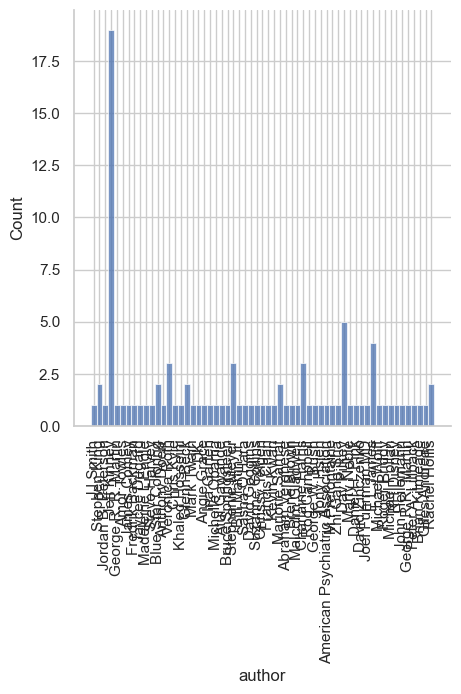

In [43]:
sns.displot(data=df_limpio, x="author", kind="hist")
plt.xticks(rotation=90)
plt.show()

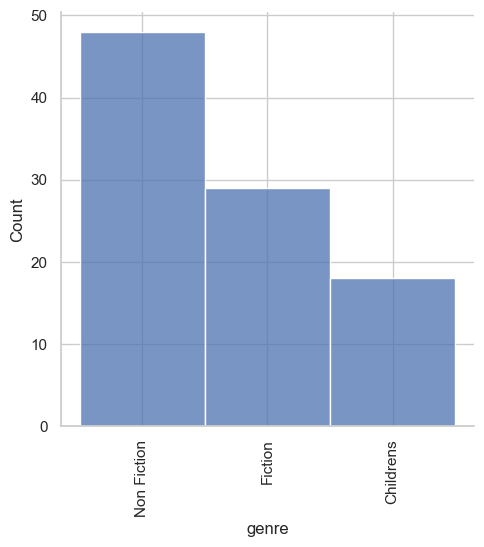

In [44]:
sns.displot(data=df_limpio, x="genre", kind="hist")
plt.xticks(rotation=90)
plt.show()

C:\Users\ABIMAEL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


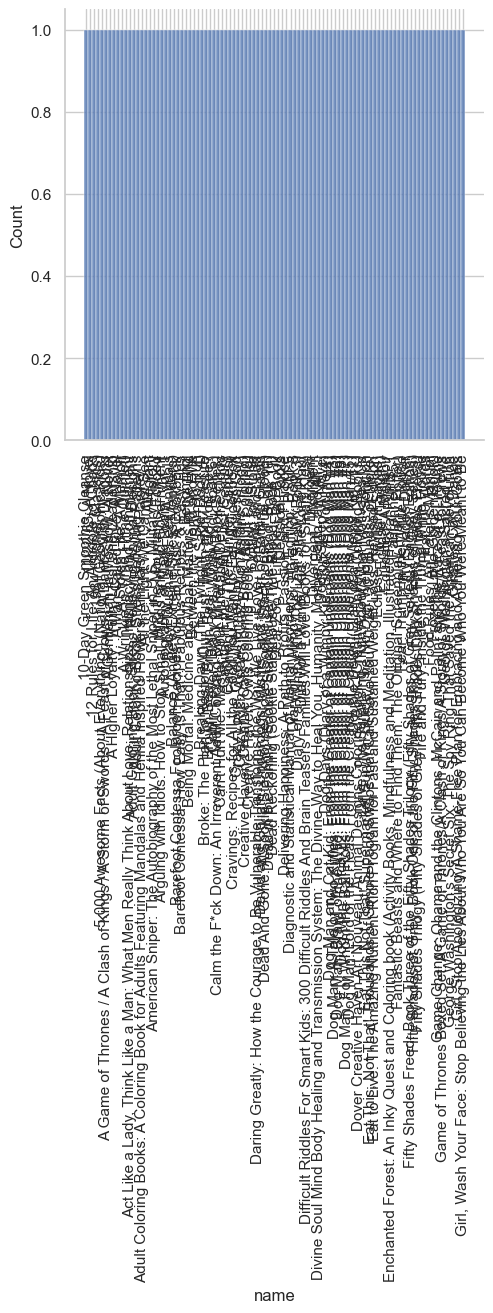

In [54]:
sns.displot(data=df_limpio, x="name", kind="hist")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='rating'>

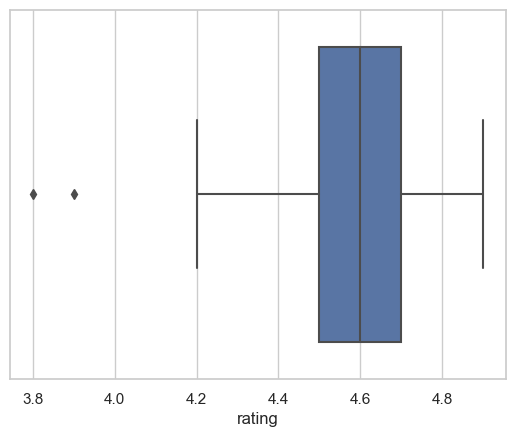

In [46]:
sns.boxplot(data=df, x="rating")

<Axes: xlabel='year'>

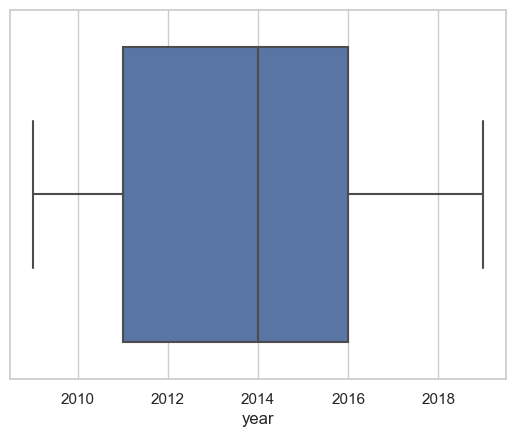

In [65]:
sns.boxplot(data=df, x="year")

In [74]:
display(df_limpio["genre"].unique())
df_limpio['genre'] = pd.Categorical(df_limpio['genre'])
#Se puede realizar la categorizacion de genre ya que es la que mas facil se puede a diferencia de author y name

['Non Fiction', 'Fiction', 'Childrens']
Categories (3, object): ['Childrens', 'Fiction', 'Non Fiction']

In [75]:
df_dummies = pd.get_dummies(df_limpio["genre"])
print(df_dummies)

    Childrens  Fiction  Non Fiction
0           0        0            1
1           0        1            0
2           0        0            1
3           0        1            0
4           1        0            0
..        ...      ...          ...
95          0        0            1
96          0        0            1
97          1        0            0
98          0        0            1
99          0        0            1

[95 rows x 3 columns]


In [76]:
df_limpio = pd.concat([df_limpio, df_dummies], axis=1)
display(df_limpio)

,name,author,rating,year,genre,Childrens,Fiction,Non Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016.0,Non Fiction,0,0,1
1,11/22/63: A Novel,Stephen King,4.6,2011.0,Fiction,0,1,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018.0,Non Fiction,0,0,1
3,1984 (Signet Classics),Jeff Kinney,4.7,2017.0,Fiction,0,1,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",Jeff Kinney,4.8,2019.0,Childrens,1,0,0
...,...,...,...,...,...,...,...,...
95,George Washington's Sacred Fire,Peter A. Lillback,4.5,2010.0,Non Fiction,0,0,1
96,George Washington's Secret Six: The Spy Ring T...,Brian Kilmeade,4.6,2013.0,Non Fiction,0,0,1
97,Giraffes Can't Dance,Giles Andreae,4.8,2015.0,Childrens,1,0,0
98,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,4.6,2019.0,Non Fiction,0,0,1


C:\Users\ABIMAEL\AppData\Local\Temp\ipykernel_22272\34874050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_limpio.corr())


<Axes: >

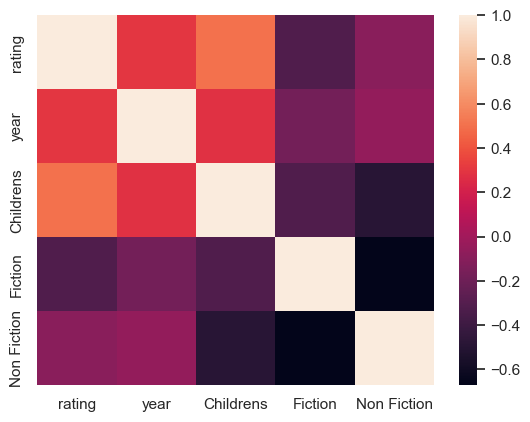

In [78]:
sns.heatmap(df_limpio.corr())

In [ ]:
#a.¿Qué columnas están más correlacionadas a rating?
#Las columnas year y chilldrens
#b.¿Qué columnas están menos correlacionadas a rating?
#Fiction
#c.¿Hay alguna correlación inversa?
#Si, en fiction y non fiction

In [84]:
q3 = df_limpio["rating"].quantile(0.75)
q1 = df_limpio["rating"].quantile(0.25)

In [ ]:
iqr = q3 - q1

lsuperior = q3 + 1.5 * iqr
linferior = q1 - 1.5 * iqr

df_limpio_sin_outliers = df_limpio[(df_limpio["rating"] > linferior) & (df_limpio["rating"] < lsuperior)]

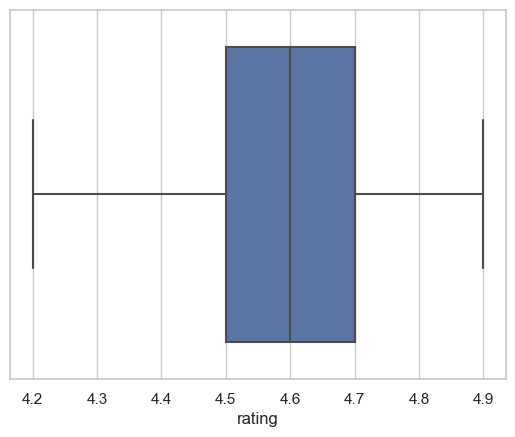

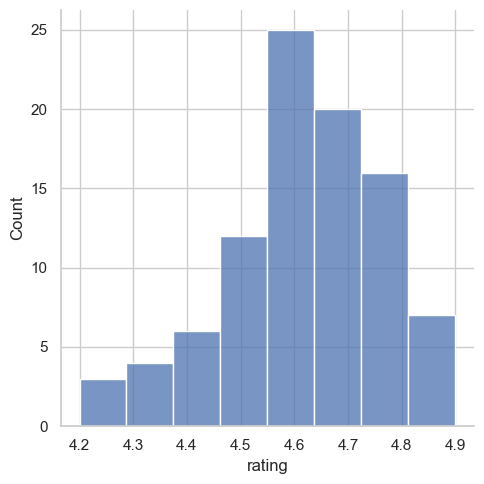

In [89]:
sns.boxplot(data=df_limpio_sin_outliers, x="rating")
sns.displot(data=df_limpio_sin_outliers, x="rating")


In [ ]:
#Tratando los datos anomalos hacemos que la distribuion se centre desde el 4.2 a 4.9 eliminando los mas bajos